In [106]:
cd part-II/
import dolfin as df
import matplotlib.pyplot as plt
%matplotlib inline
from utils import plotbeam

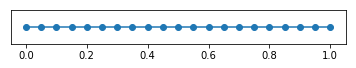

In [107]:
mesh = df.IntervalMesh(20,0.,1.)
df.plot(mesh)

In [108]:
V = df.FunctionSpace(mesh,'CG',1)
u = df.TrialFunction(V)
v = df.TestFunction(V)

In [80]:
ak = u.dx(0)*v.dx(0)*df.dx
ag = u*v*df.dx
l = df.Constant(1.)*v*df.dx
bc = df.DirichletBC(V,0.,"near(x[0],0) && on_boundary")
K,b = df.assemble_system(ak,l,bc)
G,b = df.assemble_system(ag,l,bc)

In [109]:
eigensolver = df.SLEPcEigenSolver(df.as_backend_type(K), df.as_backend_type(G))
df.info(eigensolver,True)
eigensolver.parameters["spectrum"] = "smallest real"
eigensolver.parameters["solver"] = "krylov-schur"
# lanczos, power, krylov-schur, subspace, arnoldi
eigensolver.parameters["problem_type"] = "gen_hermitian"
eigensolver.parameters["spectral_transform"] = "shift-and-invert"
eigensolver.parameters["spectral_shift"] = 0.1
n_eigen = 5
eigensolver.solve(n_eigen)

number of iterations: 10
The theoretical value for the first buckling load (clamped-free) is (pi^2*EI)/(4*L^2) =  2.4674011002723395
eigenvalue 0 :  0.9999999999999999
eigenvalue 1 :  2.4686697084425187
eigenvalue 2 :  22.309535092020198
eigenvalue 3 :  62.4817541015456
eigenvalue 4 :  123.97764357715862


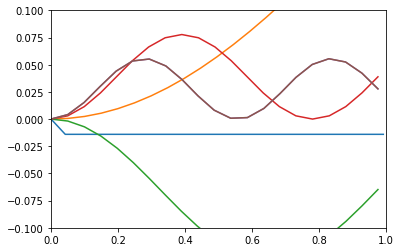

In [111]:
print("number of iterations:", eigensolver.get_number_converged())
pi= df.pi
file1 = df.File("modes.pvd")
dtheta = df.Function(V)
print("The theoretical value for the first buckling load (clamped-free) is (pi^2*EI)/(4*L^2) = ", pi**2/4.)
for i in range(n_eigen):
    dtheta.rename("mode " + str(i), "mode" + str(i))
    ri, ci, modei, cxi = eigensolver.get_eigenpair(i)
    dtheta.vector()[:] = modei/modei.norm("l2")
    file1 << (dtheta, float(i))
    print("eigenvalue", i, ": ", ri)
    theta = dtheta
    plotbeam(theta)

plt.ylim(-.1,.1)
plt.xlim(0,1.)
myplot = plotbeam(theta)
